## <font color=#40E0D0> **Multiclass Classification with Gaussian Mixture Model and Expectation Maximization Algorithm in $\mathbb{R}^d$** </font>

## <font color=#40E0D0> Content </font>
**1. Theoretical Background**

1.1 Introduction

1.2  Classification with Gaussian Mixture Model

1.2.1 Expectation Maximization Algorithm

1.3  Classification with K-Means

**2. Implementation of GMM and Expectation-Maximization for classification**

**3.  Datasets in $R^2$**

3.1. Mixture of Gaussian distributions

3.2. Mixture of circles

3.2.1 Non-Concentric Circles

3.2.2 Concentric Circles

**4.  Classification in $R^{2}$**

4.1 Training and Testing subsets

4.2 Training models

4.2.1. Initial points

4.2.2. Estimation of parameters

4.3  Classification on test set

4.4. Analysis

**5. Classification in $R^d$ where $d>=2$**

5.1. Random Generation of Parameters for Gaussian Mixture Model

5.2. GMM-EM Convergence, Errors and random Initialization

5.3. Experiments in $R^d$

**6. Conclusions**
     

## <font color=#40E0D0> 1. Theoretical Background

### <font color=#40E0D0> 1.1 Introduction </font>

In multiclass classification, we assign $\color{#D000FF}{n}$ observations $y_1, y_2,\ldots,y_\color{#D000FF}{n}$ from a random variable $Y \in \Omega \subset \mathbb{R}^d$ to one of $\color{#EC7063}{M} \geq 3$ classes, using a decision function $\color{#26CE24}{g}: \Omega  \rightarrow  \{1, \cdots, \color{#EC7063}{M}\}$ where $\Omega  = \displaystyle \bigcup_{m=1}^\color{#EC7063}{M} C_m$, and each $C_m = \{ y \in Y : \color{#26CE24}{g}(y) = m\}$ represents the $m$th class. Our aim is to naturally group similar points within each class.

We apply a a Gaussian Mixture Model (GMM) with the Expectation Maximization (EM) algorithm to address this task in $\mathbb{R}^d$, where $d\geq2$ by assigning observations to classes based on the probabilities calculated from the estimated parameters obtained from the EM algorithm. To illustrate the process, we use simulated datasets in $\mathbb{R}^2$:

* Mixture of Gaussian distributions
* Mixture of Non-Concentric Circles
* Mixture of Concentric Circles

We assess this approach by comparing it with K-Means and EM algorithms from scikit-learn, using the following performance metrics:

* Accuracy
* F1-Score
* Balanced accuracy
* Confusion Matrix

within a supervised learning setup.


Additionally, we conduct a sensitivity analysis on accuracy, log likelihood, and convergence of the relative error of estimations of our proposed approach in $\mathbb{R}^d$ with $d\geq2$ by varying the dimension $d$ and the sample number of groups $M$ of a mixture of Gaussian distributions. Our conclusions are presented at the end of the project.

### <font color=#40E0D0> 1.2 Classification with Gaussian Mixture Model </font>

Given a sample $y_i$, the unobserved class label $X$ is defined as $\displaystyle  (X|Y=y_i) = \sum_{m=1}^{\color{#EC7063}{M}} m \mathbb{1}_{y_i \in C_m}$.
Let $\pi_m = P_{\theta}(X = m)$ be the probability of observing a point from $C_m$ where $m=1,\ldots,M$  and $\displaystyle \sum_{m=1}^{\color{#EC7063}{M}} \pi_m = 1$. Applying Bayes' rule, the probability that $y_i$ belongs to $C_m$ is:


\begin{equation}
\displaystyle \color{#FFAB00}{\omega^{\theta}_{m}}(y_i):= P_{\theta}(X=m|Y=y_i) = \frac{P_{\theta}(Y=y_i|X=m)P_{\theta}(X = m)}{P_{\theta}(Y=y_i)} = \frac{\pi_m P_{\theta}(Y=y_i|X=m)}{\sum_{j=1}^{M} \pi_j P_{\theta}(Y=y_i|X=j)} \tag{1}    
\end{equation}

where $\theta$ represents the parameter distribution of $(X,Y)$.

Gaussian Mixture Model (GMM) is a clustering technique used to determine the probability that a given data point belongs to a cluster. It assumes that $Y|X=m \sim \mathcal{N}(\boldsymbol{\mu}_m, \boldsymbol{\Sigma}_m)$, where $\boldsymbol{\mu}_m \in \mathbb{R}^d$ is the mean vector, and $\boldsymbol{\Sigma}_m \in \mathbb{R}^{d \times d}$ is the invertible covariance matrix of $C_m$, for $m = 1, \dots, M$.
It follows that:

\begin{equation}
\color{#FFAB00}{\omega^{\theta}_{m}}(y_i) = \frac{\pi_m  \mathcal{N}(y_i | \boldsymbol{\mu}_m, \boldsymbol{\Sigma}_m) }{\sum_{j=1}^{M} \pi_j \mathcal{N}(y_i | \boldsymbol{\mu}_j, \boldsymbol{\Sigma}_j)} \tag{2}
\end{equation}

the joint density of $(X,Y)$ is:

\begin{equation}
\color{#001AFF}{f_{\theta}} (m ,y_i):= P_{\theta}(X=m,Y=y_i)
 = \pi_m  \mathcal{N}(y_i | \boldsymbol{\mu}_m, \boldsymbol{\Sigma}_m) \tag{3}
\end{equation}

and the density of $Y$ is:

\begin{equation}
P_{\theta}(Y=y_i ) = \sum_{m=1}^{\color{#EC7063}{M}} \pi_m \mathcal{N}(y_i | \boldsymbol{\mu}_m, \boldsymbol{\Sigma}_m) \tag{4}    
\end{equation}

where  $ \mathcal{N}(y_i| \boldsymbol{\mu}_m, \boldsymbol{\Sigma}_m) = \frac{1}{(2\pi)^{d/2}|\boldsymbol{\Sigma}_m|^{1/2}} \exp \left( -\frac{1}{2} (\mathbf{y}_i - \boldsymbol{\mu}_m)^T \boldsymbol{\Sigma}_m^{-1} (\mathbf{y}_i - \boldsymbol{\mu}_m) \right)$ is the density function of the normal law $\mathcal{N}(\boldsymbol{\mu}_m, \boldsymbol{\Sigma}_m)$ evaluated at $Y=y_i$.

The data is generated from a mixture of Gaussian distributions with $M$ components, characterized by the parameters $\theta = \{ \pi_1, \dots, \pi_{\color{#EC7063}{M}}, \mu_1, \dots, \mu_{\color{#EC7063}{M}}, \Sigma_{1}, \dots, \Sigma_{\color{#EC7063}{M}}\}$, which are estimated from $y_1, y_2, \ldots, y_{\color{#D000FF}{n}}$ using the Expectation Maximization (EM) algorithm.

The decision function $\color{#26CE24}g_{GMM}$  is defined as:

\begin{equation}
\color{#26CE24}g_{GMM}(y_i,\hat{\theta}) = \underset{m \in \Omega}{\text{argmax}} \, \color{#FFAB00}{\omega^{\hat{\theta}}_{m}}(y_i) \tag{5}
\end{equation}

This function assigns observation $y_i$ to the class $m$ that maximizes the probability $\color{#FFAB00}{\omega^{\hat{\theta}}_{m}}(y_i)$, given the estimated parameters $\hat{\theta}$ obtained from the EM algorithm.


#### <font color=#40E0D0> 1.2.1 Expectation Maximization Algorithm </font>

The Expectation Maximization (EM) algorithm is an iterative method used to estimate $\theta$. Here are the general steps it follows:

*   **Initialization $k=0$ :**

  Set $\hat{\theta}^{(0)}= \{ \hat{\pi}^{(0)}_1, \dots,\hat{\pi}^{(0)}_{\color{#EC7063}{M}}, \hat{\mu}^{(0)}_1, \dots, \hat{\mu}^{(0)}_{\color{#EC7063}{M}}, \hat{\Sigma}^{(0)}_{1}, \dots, \hat{\Sigma}^{(0)}_{\color{#EC7063}{M}}\}$
    arbitrarily.

*   **For $k>0$ :**

  *   **E-step (Expectation step):** evaluate
  
\begin{equation}
Q({\theta, \hat\theta}^{(k)}) = E_{\hat{\theta}^{(k)}}[ \log \color{#001AFF}{f_{\theta}}(X,Y)] \tag{6}
\end{equation}

   using the density $ \color{#FFAB00}{\omega^{\hat{\theta}^{(k)}}_{X}}(Y)$  of $X|Y$.  


  *   **M-step (Maximization step):** Update the parameters $\theta$ using
    
\begin{equation}
\hat{\theta}^{(k+1)} \in  \underset{\theta \in  \Theta }{\text{argmax}} \ Q({\theta, \hat\theta}^{(k)}) \tag{7}
 \end{equation}
  
  where $\Theta$ is the parameter space.

In the context of GMM, given an iid sample $\{(x_i,y_i)\}_{1\leq i\leq \color{#D000FF}{n}}$ of $(X,Y)$, the log-likelihood associated with $\theta$ is

\begin{equation}
\begin{aligned}
    \log \color{#001AFF}{f_{\theta}}(x_{1:n},y_{1:n}) &= \sum_{i=1}^{\color{#D000FF}{n}} \log \left\{\pi_{x_i}  \mathcal{N}(y_i | \boldsymbol{\mu}_{x_i}, \boldsymbol{\Sigma}_{x_i})   \right\} \\
     &= \sum_{i=1}^{\color{#D000FF}{n}}{\sum_{m=1}^{\color{#EC7063}{M}}{\mathbb{1}_{x_i = m} \left\{ \log \pi_m - \frac{1}{2} \log (2\pi)^{d}|\boldsymbol{\Sigma}_m| -\frac{1}{2} \left((y_i - \boldsymbol{\mu}_m)^T \boldsymbol{\Sigma}_m^{-1} (y_i - \boldsymbol{\mu}_m) \right) \right\} }}
\end{aligned}
\tag{8}
\end{equation}

the E-step becomes

\begin{equation}
\begin{aligned}
    Q(\theta,\hat{\theta}^{(k)}) &= E_{\hat{\theta}^{(k)}}[ \log \color{#001AFF}{f_{\theta}}(x_{1:\color{#D000FF}{n}}, y_{1:\color{#D000FF}{n}} ) ] \\
    &=  \sum_{i=1}^{\color{#D000FF}{n}}{\sum_{m=1}^{\color{#EC7063}{M}}{ \color{#FFAB00}{\omega^{\hat{\theta}^{(k)}}_{m}}(y_i)\left\{ \log \pi_m - \frac{1}{2} \log (2\pi)^{d}|\boldsymbol{\Sigma}_m| -\frac{1}{2} \left((y_i - \boldsymbol{\mu}_m)^T \boldsymbol{\Sigma}_m^{-1} (y_i - \boldsymbol{\mu}_m) \right) \right\}}}
\end{aligned}
\tag{9}
\end{equation}

The optimality conditions $\nabla_{\theta} Q(\theta, \hat{\theta}^{(k)}) = 0$ for the M-step yield  

\begin{equation}
\hat{\pi}_m^{(k+1)} = \frac{1}{\color{#D000FF}{n}} \sum_{i=1}^{\color{#D000FF}{n}} \color{#FFAB00}{\hat{\omega}_m^{(k)}}(y_i) \tag{10}
\end{equation}

\begin{equation}
\hat{\mu}_m^{(k+1)} = \sum_{i=1}^{\color{#D000FF}{n}} \frac{{\color{#FFAB00}{\hat{\omega}_m^{(k)}}(y_i)}}{\sum_{j=1}^{\color{#D000FF}{n}}{\color{#FFAB00}{\hat{\omega}_m^{(k)}}(y_j)}}\cdot y_i \tag{11}
\end{equation}

\begin{equation}
\hat{\Sigma}_m^{(k+1)} = \sum_{i=1}^{\color{#D000FF}{n}} \frac{ \color{#FFAB00}{\hat{\omega}_m^{(k)}}(y_i) }{\sum_{j=1}^{\color{#D000FF}{n}}\color{#FFAB00}{\hat{\omega}_m^{(k)}}(y_j)} \cdot (y_i - \boldsymbol{\hat{\mu}}_m^{(k+1)})(y_i - \boldsymbol{\hat{\mu}}_m^{(k+1)})^T \tag{12}
\end{equation}


The EM algorithm for GMM reads:


*  Set an initial estimation $\hat{\theta}^{(0)}= \{ \hat{\pi}^{(0)}_1, \dots,\hat{\pi}^{(0)}_{\color{#EC7063}{M}}, \hat{\mu}^{(0)}_1, \dots, \hat{\mu}^{(0)}_{\color{#EC7063}{M}}, \hat{\Sigma}^{(0)}_{1}, \dots, \hat{\Sigma}^{(0)}_{\color{#EC7063}{M}}\}$.
   

*   **For $k>0$ :**

  *   Calculate ${\hat{\omega}_m^{\hat{\theta}^{(k)}}}(y_i)$ for $i=1,…,n$ from equation (2).
  
  * Update $\hat{\theta}^{(k+1)}$ using equations (10), (11), (12).

### <font color=#40E0D0> 1.3 Classification with K-Means </font>

The k-means algorithm is a popular unsupervised machine learning algorithm used for clustering data points into a predetermined number of clusters. It is widely used for various applications such as image segmentation, customer segmentation, anomaly detection, and it can also apply on gaussian mixture model.

The goal of k-means algorithm is to find a partition of points which minimize the variances of each group.

**K-means algorithm**

Let $y=\{y_1,y_2,\ldots,y_\color{#D000FF}{n}\}$ be a set of samples in which $y_i\in\mathbb{R}^d$ and $i=\{1,\ldots,\color{#D000FF}{n}\}$.

* Support: $S=\{S_1,\ldots,S_\color{#EC7063}{M}\}$ clusters of $y$, in which $|S_j|=m_j$ and ${\overset{\color{#EC7063}{M}}{\underset{j=1}\sum{}}}m_j=\color{#D000FF}{n}$
* Parameters:
  1. Samples: $\{y_1,y_2,\ldots,y_\color{#D000FF}{n}\}$
  2. Mean values of $S$: $\{\mu_1,\ldots,\mu_\color{#EC7063}{M}\}$
  3. Variances of $S$: $\{\sigma_1,\ldots,\sigma_\color{#EC7063}{M}\}$
* Objectif: Find
$$\arg\underset{S}{\min}{\overset{\color{#EC7063}{M}}{\underset{j=1}\sum{}}}\underset{y_i\in S_j}{\sum{}}\lVert y_i-\mu_j \rVert ^2=\arg\underset{S}{\min}{\overset{\color{#EC7063}{M}}{\underset{j=1}\sum{}}}m_j\,\sigma_j$$
* Algorithm steps:
  1. Initiation: Choose initial centroids of clusters $\{\mu_1^{(0)},\ldots,\mu_\color{#EC7063}{M}^{(0)}\}.$
  2. Assignment: Assign each sample to the cluster of nearest centroid:
$$S_k^{(t)}=\{y_p\in y:\lVert y_p-\mu_k^{(t)} \rVert^2\le\lVert y_p-\mu_j^{(t)}\rVert ^2,1\le j\le \color{#EC7063}{M}\},1\le k\le \color{#EC7063}{M}$$
  3. Update: Recalculate the centroids of each cluster:
$$\mu_k^{(t+1)}=\frac{1}{m_k^{(t)}}\underset{y_i\in S_k^{(t)}}{\sum}y_i$$
  4. Repeat: Repeat step 2 and step 3 until the centroids no longer change significantly or a specified number of iterations is reached.

## <font color=#40E0D0> 2.  Implementation of GMM and Expectation-Maximization for classification.

In [ ]:
import seaborn as sns
import math
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the seed
from numpy.random import default_rng
rng = default_rng(10)

In [ ]:
def Gaussian_pdf(y, mu, cov):
    """Computes the PDF of a Gaussian distribution.

    Inputs:
        y: Array of data points.
        mu: Mean vector.
        cov: Covariance matrix.

    Returns:
        p: Array containing the PDF values.
    """
    d = np.size(mu)
    n = np.size(y, axis=0)

    def Gaussian(s):
        return 1 / np.sqrt((((2 * np.pi) ** d) * np.linalg.det(cov))) * np.exp(
            -0.5 * np.dot((s - mu) @ np.linalg.inv(cov), s - mu)
        )

    p = np.array([Gaussian(y[i]) for i in range(n)])
    return p


def Multi_Gaussian_mixture_pdf(mu, cov, weights):
    """Computes the PDF of a Gaussian mixture distribution.

    Inputs:
        mu: Mean vectors.
        cov: Covariance matrices.
        weights: Weights.

    Returns:
        pdf: A function for computing the PDF of the Gaussian mixture.
    """
    M = len(weights)

    def pdf(y):
        p = 0
        for i in range(M):
            # Equation 4
            p += weights[i] * Gaussian_pdf(y, mu[i], cov[i])
        return p

    return pdf



def EM_GMM(Y, M, pi_ini, mu_ini, cov_ini, step=100, tol=1e-5):
    """Performs EM algorithm to estimate the parameters of a Gaussian Mixture Model (GMM).

    Inputs:
        Y: Input data points.
        M: Number of classes.
        pi_ini: Initial priors.
        mu_ini : Initial mean vectors.
        cov_ini : Initial covariance matrix.
        step : Maximum number of EM steps.
        tol : Tolerance for convergence.

    Returns:
        pi: Estimated class priors.
        mu: Estimated mean vectors.
        cov: Estimated covariance matrices.
        loglikelihood: Log-likelihood values at each step of the EM algorithm.
        error_mu: Relative errors in mean vectors between consecutive steps.
        error_cov: Relative errors in covariance matrices between consecutive steps.
        error_pi: Relative errors in class priors between consecutive steps.
    """
    d = np.size(Y[0])
    n_samples = np.size(Y, axis=0)
    cov = cov_ini.copy()
    mu = mu_ini.copy()
    pi = pi_ini.copy()
    loglikelihood = np.zeros(step)
    error_mu = []
    error_pi = []
    error_cov = []

    for t in range(step):
        likelihood = []
        weightedlik = []

        for j in range(M):
            likelihood.append(Gaussian_pdf(Y, mu[j], cov[j]))
            # Equation 3
            weightedlik.append(pi[j] * (likelihood[j]))

        likelihood = np.array(likelihood)
        weightedlik = np.array(weightedlik)
        w = []

        # EM
        mu_prec = mu.copy()
        cov_prec = cov.copy()
        pi_prec = pi.copy()

        for j in range(M):
            # Equation 2
            w.append((weightedlik[j]) / (np.sum([weightedlik[i] for i in range(M)], axis=0)))
            # Equation 11
            mu[j] = np.einsum('i,ij->j', w[j], Y) / (np.sum(w[j]))
            # Equation 12
            cov[j] = np.sum([w[j][i] * np.einsum('i,j->ij', Y[i] - mu[j], Y[i] - mu[j]) for i in range(n_samples)],
                            axis=0) / (np.sum(w[j]))
            # Equation 10
            pi[j] = np.mean(w[j])

        pi[M - 1] = 1 - np.sum(pi[0:-1])
        weightedlik = np.sum(weightedlik, 0)
        loglikelihood[t] = np.sum(np.log(weightedlik))

        error_mu.append(relative_error_mu(mu_prec, mu))
        error_cov.append(relative_error_cov(cov_prec, cov))
        error_pi.append(relative_error_pi(pi_prec, pi))

        if t != 0:
            diff = np.abs((loglikelihood[t] - loglikelihood[t - 1])/loglikelihood[t - 1])
            if diff < tol:
                # Set loglikelihood array of size t
                loglikelihood = loglikelihood[:t+1]
                break

    return pi, mu, cov, loglikelihood, error_mu, error_cov, error_pi


def classification_GMM(Y, M, pi, mu, cov):
    """
    Performs classification using Gaussian Mixture Model (GMM).

    Inputs:
        Y: Input data points.
        M: Number of classes.
        pi: Class priors.
        mu: Mean vectors.
        cov: Covariance matrices.

    Returns:
        X: Class labels.
    """
    n_samples = Y.shape[0]

    w = [None]*M

    for j in range(M):
        # Equation 3
        w[j]=(pi[j] * Gaussian_pdf(Y, mu[j], cov[j]))

    w = np.array(w)
    # Equation 2
    w = w / np.sum(w, axis=0)
    # Equation 5
    X = np.argmax(w, axis=0)

    return X

## <font color=#40E0D0> 3. Data sets in $R^2$



We selected three simulated datasets—Mixture of Gaussian distributions, Mixture of Non-Concentric Circles, and Concentric Circles— to deploy our proposed solution. The analysis is conducted with a sample size of $n = 2000$ and $M = 3$ categories.

In [ ]:
d=2         # dimension
n=2000      # size sample
M=3         # Number of clusters

scatter plot in $R^2$

In [ ]:
def plot_scatter(data, title):
    min_value = np.min(data)
    max_value = np.max(data)
    plt.figure(figsize=(4, 4))
    plt.scatter(data[:, 0], data[:, 1], color='blue', s=8, alpha=0.5)
    plt.title(title)
    plt.xlabel("y1")
    plt.ylabel("y2")
    plt.xlim(min_value, max_value)
    plt.ylim(min_value, max_value)
    plt.tight_layout()  # Automatically adjusts the layout of elements in the figure
    plt.show()

### <font color=#40E0D0> 3.1. Mixture of Gaussian distributions

Step 1. Generate $X = m \sim \pi_m$ where $m \in \{1,\dots M\}$

Step 2. Generate $Y=y | X = m \sim  \mathcal{N}(\boldsymbol{\mu}_m, \boldsymbol{\Sigma}_m)$

In [ ]:
def multi_gaussian_mixture_sample(n, mu, cov, weights):
    """
    Generates samples from a Gaussian mixture distribution.

    Inputs:
        n: Number of samples to generate.
        mu: List of mean vectors for each component of the Gaussian mixture.
        cov: List of covariance matrices for each component of the Gaussian mixture.
        weights: List of weights for each component of the Gaussian mixture.

    Returns:
        X: Indices of the components from which each sample is drawn.
        Y: Generated samples from the Gaussian mixture distribution.
    """
    K = np.size(weights)
    d = np.size(mu[0])
    #Step 1
    #X = np.random.choice(range(K), n, p=weights)
    X = rng.choice(range(K), n, p=weights)
    #Step 2
    Y = np.array([rng.multivariate_normal(mu[X[i]], cov[X[i]]) for i in range(n)])
    return X, Y


The covariance matrix is constructed for $X \sim  \mathcal{N}(0, \sigma_1^2)$ and $Y \sim  \mathcal{N}(0, \sigma_2^2)$ where $corr(X,Y)=\rho$

$\Sigma =
\begin{pmatrix}
\sigma_1^2 & \rho \sigma_1 \sigma_2  \\
\rho \sigma_1 \sigma_2 & \sigma_2^2 \\
\end{pmatrix}
$

In [ ]:
def mat_cov(ds_x, ds_y, rho):
    """
    Calculates the covariance matrix for two datasets.

    Inputs:
        ds_x: Variance of the first dataset.
        ds_y: Variance of the second dataset.
        rho: Correlation coefficient between the datasets.

    Returns:
        cov_matrix: Covariance matrix of the two datasets.
    """
    var_x = ds_x ** 2
    cov_xy = rho * ds_x * ds_y
    var_y = ds_y ** 2
    return np.array([[var_x, cov_xy], [cov_xy, var_y]])

Parameterization and Sampling:

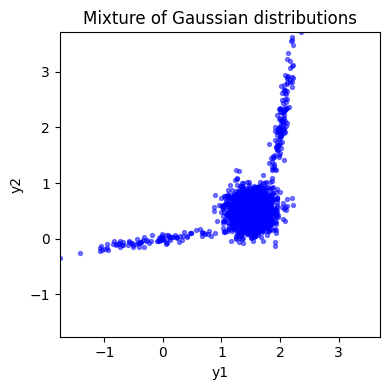

In [ ]:
#Define parameters for the Gaussian mixture distribution

# First Gaussian component
pi1 = 0.05
mu1 = np.array([0, 0])
cov1 = mat_cov(0.6, 0.1, 0.9)

# Second Gaussian component
pi2 = 0.07
mu2 = np.array([2, 2])
cov2 = mat_cov(0.1, 0.6, 0.9)

#Third Gaussian component
pi3 = 1-pi1-pi2
mu3 = np.array([1.5, 0.5])
cov3 = mat_cov(0.2, 0.2, 0)

# Combine parameters for all components
mu_gm = [mu1, mu2, mu3]
cov_gm = [cov1, cov2, cov3]
weights_gm = [pi1, pi2, pi3]

# Generate samples from the Gaussian mixture distribution
X_gm, Y_gm = multi_gaussian_mixture_sample(n, mu_gm, cov_gm, weights_gm)

# Plot the generated samples
plot_scatter(Y_gm, "Mixture of Gaussian distributions")


### <font color=#40E0D0> 3.2. Mixture of circles

Step 1. Generate $X = m \sim = \pi_m$ where $m \in \{1,\dots M\}$

Step 2. Generate $Y=y | X = m \sim  \mathcal{U}(\boldsymbol{C}_{t_m,r_m})$

where $\boldsymbol{C}_{t_m,r_m}$ is the circle of center $t_m$ and radius $r_m$. It is generated by transforming the polar coordinates into Cartesian ones:

\begin{aligned}
y_0 &= r_m \cdot \cos ( \theta) + t_{m0} \\
y_1 &= r_m\cdot \sin ( \theta) + t_{m1}
\end{aligned}


where  $t_m = [t_{m0},t_{m1}]$, $r_m \sim \mathcal{U}[r_{\text{inner}},r_{\text{outer}}]$, and $\theta \sim \mathcal{U}[0,2 \pi]$.

In [ ]:
def uniform_circle_samples(center, radius_inner, radius_outer):
    """
    Generates uniformly distributed points within a circular annulus.

    Inputs:
        center: Center coordinates of the circular annulus.
        radius_inner: Inner radius of the annulus.
        radius_outer: Outer radius of the annulus.

    Returns:
        sample: Array containing the Cartesian coordinates of the sampled point.
    """
    # Generate a random angle (theta) uniformly between 0 and 2π radians.
    #theta = np.random.uniform(0, 2 * np.pi)
    theta = rng.uniform(0, 2 * np.pi)

    # Sample a random radius (r) uniformly from within the annulus.
    #r = np.sqrt(np.random.uniform(radius_inner**2, radius_outer ** 2))
    r = np.sqrt(rng.uniform(radius_inner**2, radius_outer ** 2))

    # Convert the polar coordinates (r, theta) to Cartesian coordinates (x, y).
    x = r * np.cos(theta) + center[0]
    y = r * np.sin(theta) + center[1]

    # Return an array containing the Cartesian coordinates of the sampled point [x, y].
    return np.array([x, y])


def generate_circular_mixture_samples(n, radius, centers, weights):
    """
    Generates samples from a mixture of circular distributions.

    Inputs:
        n: Number of samples to generate.
        radius: Inner and outer radius of each circular distribution.
        centers: Center coordinates of each circular distribution.
        weights: Weights of each circular distribution.

    Returns:
        X: Component indices assigned to each sample.
        Y: Cartesian coordinates of the generated samples.
    """
    # Step 1: Randomly select component indices based on the provided weights
    X = rng.choice(range(len(weights)), size=n, p=weights)
    samples = []
    # Step 2: Generate samples for each selected component
    for i in range(n):
        # Get the component index for the current sample
        component_idx = X[i]
        # Extract inner and outer radius for the current component
        rad_inner = radius[0][component_idx]
        rad_outer = radius[1][component_idx]
        # Get the center coordinates for the current component
        center = centers[component_idx]
        # Generate a sample within the circular annulus
        sample = uniform_circle_samples(center, rad_inner, rad_outer)
        samples.append(sample)
    # Convert the list of samples to a numpy array
    Y = np.array(samples)
    return X, Y

#### <font color=#40E0D0> 3.2.1. Non-Concentric Circles

Parameterization and Sampling:

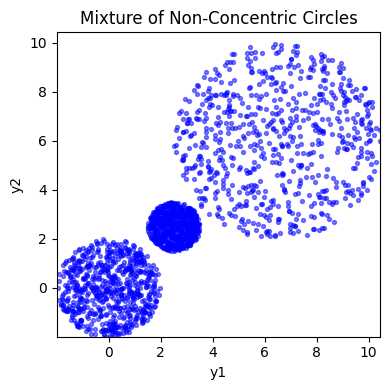

In [ ]:
# Define parameters

# First circular component
pi1 = 2/6
rad_inner_1 = 0
rad_outer_1 = 2
center1 = [0, 0]

# Second circular component
pi2 = 2/6
rad_inner_2 = 0
rad_outer_2 = 1
center2 = [2.5, 2.5]

# Third circular component
pi3 = 2/6
rad_inner_3 = 0
rad_outer_3 = 4
center3 = [6.5, 6]

# Combine parameters for all components
rad_inner = [rad_inner_1, rad_inner_2, rad_inner_3]
rad_outer = [rad_outer_1, rad_outer_2, rad_outer_3]
rad_ncc = [rad_inner, rad_outer]
weights_ncc = [pi1, pi2, pi3]
mu_ncc = [center1, center2, center3]

# Generate samples from the mixture of circular distributions
X_ncc, Y_ncc = generate_circular_mixture_samples(n, rad_ncc, mu_ncc, weights_ncc)

# Plot the generated samples
plot_scatter(Y_ncc, "Mixture of Non-Concentric Circles")



#### <font color=#40E0D0> 3.2.2. Concentric circles

Parameterization and Sampling:

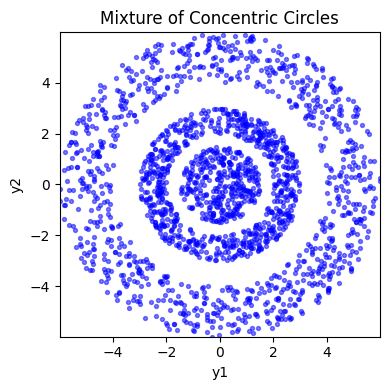

In [ ]:
# Define parameters for the Circular mixture distribution

# Inner circle
pi1 = 1/6
rad_inner_1 = 0
rad_outer_1 = 1.5
center1 = [0, 0]

# Middle circle
pi2 = 2/6
rad_inner_2 = 2
rad_outer_2 = 3
center2 = [0, 0]

# Outer circle
pi3 = 3/6
rad_inner_3 = 4
rad_outer_3 = 6
center3 = [0, 0]

# Combine parameters for all circular distributions
weights_cc = [pi1, pi2, pi3]
rad_inner = [rad_inner_1, rad_inner_2, rad_inner_3]
rad_outer = [rad_outer_1, rad_outer_2, rad_outer_3]
rad_cc = [rad_inner, rad_outer]
mu_cc = [center1, center2, center3]

# Generate samples from the mixture of concentric circles
X_cc, Y_cc = generate_circular_mixture_samples(n, rad_cc, mu_cc, weights_cc)

# Plot the generated samples
plot_scatter(Y_cc, "Mixture of Concentric Circles")


## <font color=#40E0D0> 4. Classification in $R^2$

### <font color=#40E0D0> 4.1. Training and Testing subsets

The datasets are randomly divided into training and testing subsets in a 70/30 ratio at the class level. This approach helps to prevent bias and overfitting while preserving the inherent cluster structure of the data.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def split_train_test_mixture(X, Y, test_size=0.3, random_state=None):
    """
    Splits the data into training and testing sets at the cluster level.

    Inputs:
        X: Component indices assigned to each sample.
        Y: Samples.
        test_size: The proportion of the dataset to include in the test split.
        random_state: Controls the randomness of the shuffling.

    Returns:
        X_train: Component indices of training data.
        Y_train: Training data.
        X_test: Component indices of testing data.
        Y_test: Testing data.
    """
    # Get unique cluster labels
    unique_labels = np.unique(X)


    # Initialize lists to store training and testing data for each cluster
    X_train_clusters, Y_train_clusters, X_test_clusters, Y_test_clusters = [], [], [], []

    # Split data for each cluster
    for label in unique_labels:
        # Find indices of samples belonging to the current cluster
        cluster_indices = np.where(X == label)[0]

        # Split cluster data into training and testing sets
        X_train_cluster, X_test_cluster, Y_train_cluster, Y_test_cluster = \
            train_test_split(X[cluster_indices], Y[cluster_indices], test_size=test_size, random_state=random_state)

        # Add cluster data to lists
        X_train_clusters.append(X_train_cluster)
        X_test_clusters.append(X_test_cluster)
        Y_train_clusters.append(Y_train_cluster)
        Y_test_clusters.append(Y_test_cluster)

    # Concatenate cluster data to create final training and testing sets
    X_train = np.concatenate(X_train_clusters)
    X_test = np.concatenate(X_test_clusters)
    Y_train = np.concatenate(Y_train_clusters)
    Y_test = np.concatenate(Y_test_clusters)

    return X_train, Y_train, X_test, Y_test


Data Splitting for all the mixtures

In [ ]:
# Mixture of Gaussian distributions
X_gm_train, Y_gm_train, X_gm_test, Y_gm_test = split_train_test_mixture(X_gm, Y_gm, test_size=0.3, random_state=42)

# Mixture of Non-Concentric Circles
X_ncc_train, Y_ncc_train, X_ncc_test, Y_ncc_test = split_train_test_mixture(X_ncc, Y_ncc, test_size=0.3, random_state=42)

# Mixture of Concentric Circles
X_cc_train, Y_cc_train, X_cc_test, Y_cc_test = split_train_test_mixture(X_cc, Y_cc, test_size=0.3, random_state=42)

### <font color=#40E0D0> 4.2. Training models

To assess the performance of our Section 2 algorithm (GMM EM), we will compare it with scikit-learn's KMeans (KMeans SL) and Gaussian Mixtures (GMM SL) implementations.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, confusion_matrix
from itertools import permutations

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
# Ignore RuntimeWarning related to explicit initial center position
warnings.filterwarnings("ignore", message="Explicit initial center position passed")
# Ignore FutureWarning related to the n_init parameter
warnings.filterwarnings("ignore", message="The default value of `n_init` will change")

#### <font color=#40E0D0> 4.2.1. Initial points

We initialize the Expectation-Maximization (EM) algorithm for Gaussian Mixture Models (GMM) using the results of KMeans clustering. The means are set to the cluster centers, the covariances are calculated using the within-cluster covariances, and the weights are determined by the fractions of data points allocated to each cluster. For further details, please refer to the following reference:

Biernacki, Christophe, Gilles Celeux, and Gerard Govaert. "Choosing starting values for the EM algorithm for getting the highest likelihood in multivariate Gaussian mixture models." Computational Statistics & Data Analysis 41 (2003): 561-575. DOI: 10.1016/S0167-9473(02)00163-9.

To ensure alignment between unsupervised clusters and class labels in the supervised setting, outputs of EM implementations are reordered based on their distances to the true class means. Similarly, in Scikit-learn implementations, outputs are reordered using permutations of classes that optimize accuracy at the class level. These functions maintain the inherent cluster structure by ensuring that sample points within their original clusters remain consistently assigned to the same cluster after reordering.

In [ ]:
def initialization_kmeans(Y, M, d):
    """
    Initialize the parameters for the EM algorithm using k-means.

    Inputs:
        Y: Samples.
        M: Number of classes.
        d: Dimension space of samples.

    Returns:
        mu: Centers of classes obtained by unsupervised k-means.
        covariances: Within-cluster covariances.
        pi: Fractions of data points allocated to each cluster.
    """
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=M, random_state=0, n_init=10).fit(Y)

    # Get cluster labels and centers
    classes_km = kmeans.labels_
    mu_km = kmeans.cluster_centers_

    # Compute within-cluster covariances
    covariances_km = []
    for m in range(M):
        Y_m = Y[classes_km == m]
        #cov_m = np.cov(Y_m, rowvar=False)  # Compute covariance matrix for cluster m
        cov_m=np.eye(d)
        covariances_km.append(cov_m)

    # Compute fractions of data points allocated to each cluster
    #pi_km = np.bincount(classes_km) / len(Y)
    pi_km = np.ones(M)/M

    #for i in range(len(mu_km)):
    #    if  mu_km[i] is None:
    #        mu_km[i] = np.zeros(d).tolist()
    #    if  covariances_km[i] is None:
    #        covariances_km[i] = [np.eye(d)[:, i].tolist() for i in range(d)]
    #    if pi_km[i] is None:
    #        pi_km[i] = 0
    pi_km = pi_km.tolist()
    return mu_km, covariances_km, pi_km


def reorder_unsupervised(mu_real, mu, covariances, pi, labels):
    """
    Reorder the parameters from the unsupervised scikit-learn methods based on the distance of the rows of mu to mu_real.

    Inputs:
        mu_real: Real means.
        mu: Centers of classes obtained by unsupervised K-means.
        covariances: Within-cluster covariances.
        pi: Fractions of data points allocated to each cluster.
        labels: Cluster labels.

    Returns:
        mu_reordered: Reordered centers of classes.
        covariances_reordered: Reordered within-cluster covariances.
        pi_reordered: Reordered fractions of data points allocated to each cluster.
        label_reordered: Reordered cluster labels.
    """
    # Compute distances between rows of mu and mu_real
    distances = np.linalg.norm(mu[:, np.newaxis, :] - mu_real, axis=2)

    # Get the order of mu rows based on distances
    order = np.argmin(distances, axis=1)

    if len(set(order)) < len(order):
        order = np.arange(0,len(mu_real),1)

    # Reorder mu, covariances, and pi
    mu_reordered = [None] * len(mu_real)
    covariances_reordered = [None] * len(mu_real)
    pi_reordered = [None] * len(mu_real)
    if labels is not None:
        labels_reordered = labels.copy()
    else:
        labels_reordered = [None] * len(mu_real)

    for i in range(len(mu_real)):
        mu_reordered[order[i]] = mu[i].tolist()
        covariances_reordered[order[i]] = covariances[i].tolist()
        pi_reordered[order[i]] = pi[i]
        if labels is not None:
            labels_reordered[labels_reordered == i] = order[i]

    return mu_reordered, covariances_reordered, pi_reordered, labels_reordered


def assign_indices(predicted_labels,true_labels):
    # Get unique true labels
    labeltype=np.unique(true_labels)
    # Number of unique true labels
    n=np.size(labeltype)
    # Convert to list for permutation
    labeltype=list(labeltype)
    # Generate all permutations of unique true labels
    label_list= permutations(labeltype)
    # Calculate the number of correct predictions with the initial label assignment
    d0=np.sum(1*(predicted_labels==true_labels))
    # Initialize the best permutation and the number of correct predictions
    indice=labeltype
    # Iterate over each permutation of labels
    for rank in label_list:
        # Initialize new labels based on current permutation
        new_labels=np.zeros(np.size(true_labels))
        # Assign new labels based on the current permutation
        for i in range(n):
            new_labels[predicted_labels==i]=rank[i]
        # Calculate the number of correct predictions with the new label assignment
        d1=np.sum(1*(new_labels==true_labels))
        # If the new assignment improves accuracy, update the best permutation and the number of correct predictions
        if d1>d0:
            indice=rank
            d0=np.sum(1*(new_labels==true_labels))
    # Assign the final labels based on the best permutation
    for j in range(n):
        new_labels[predicted_labels==j]=indice[j]
    # Return the final labels
    return new_labels


Initialization and reordering of parameters for Train Sets

In [ ]:
# Initialization of GMM parameters for each train set

# Gaussian Mixture
mu_gm_0, covariances_gm_0, pi_gm_0 = initialization_kmeans(Y_gm_train, M, d)
# Non-Concentric Circles
mu_ncc_0, covariances_ncc_0, pi_ncc_0 = initialization_kmeans(Y_ncc_train, M, d)
# Concentric Circles
mu_cc_0, covariances_cc_0, pi_cc_0 = initialization_kmeans(Y_cc_train, M, d)

# Reorder EM GMM parameters from the unsupervised kmeans based on distance to true class means

# Gaussian Mixture
mu_gm_0, covariances_gm_0, pi_gm_0,_ = reorder_unsupervised(mu_gm, mu_gm_0, covariances_gm_0, pi_gm_0, None)


# Non-Concentric Circles
mu_ncc_0, covariances_ncc_0, pi_ncc_0,_ = reorder_unsupervised(mu_ncc, mu_ncc_0, covariances_ncc_0, pi_ncc_0, None)
# Concentric Circles
mu_cc_0, covariances_cc_0, pi_cc_0,_ = reorder_unsupervised(mu_cc, mu_cc_0, covariances_cc_0, pi_cc_0, None)


print("Initial centers")
print("Gaussian Mixture")
print(mu_gm)
print(mu_gm_0)
print("Non-Concentric Circles")
print(mu_ncc)
print(mu_ncc_0)
print("Concentric Circles")
print(mu_cc)
print(mu_cc_0)

Initial centers
Gaussian Mixture
[array([0, 0]), array([2, 2]), array([1.5, 0.5])]
[[-0.18314824964038978, -0.029183255660863994], [2.042374665912872, 2.255730227283602], [1.4975932854673817, 0.5017979573282073]]
Non-Concentric Circles
[[0, 0], [2.5, 2.5], [6.5, 6]]
[[0.09540207799576539, -0.0502144073946571], [2.795698053031803, 2.745191849392867], [6.818146091744609, 6.5430460561367685]]
Concentric Circles
[[0, 0], [0, 0], [0, 0]]
[[1.4742456302835973, -2.609740784919318], [1.6192519067625517, 2.484454137187186], [-2.8477765482365767, 0.014522952907823988]]


#### <font color=#40E0D0> 4.2.2. Estimation of parameters

Training and Evaluation functions

In [ ]:
def train_models(sample_train, mu_0, covariances_0, pi_0, M):
    """
    Train Gaussian Mixture Models (GMM) and KMeans models.

    Inputs:
        sample_train: Training samples for each dataset.
        mu_0: Initial means for each dataset.
        covariances_0: Initial covariances for each dataset.
        pi_0: Initial weights for each dataset.
        M: Number of clusters.

    Returns:
        pi_gmm_em: Fractions of data points allocated to each cluster for GMM EM.
        mu_gmm_em: Centers of classes obtained by GMM EM.
        cov_gmm_em: Within-cluster covariances obtained by GMM EM.
        loglikelihood_gmm_em: Log-likelihood of each GMM EM model.
        gmm: Trained GMM models.
        kmeans: Trained KMeans models.
        error_mu: Relative errors in mean vectors between consecutive steps for GMM EM.
        error_cov: Relative errors in covariance matrices between consecutive steps for GMM EM.
        error_pi: Relative errors in class priors between consecutive steps for GMM EM.
    """
    # Initialize lists to store trained models and results
    pi_gmm_em = [None] * len(mu_0)
    mu_gmm_em = [None] * len(mu_0)
    cov_gmm_em = [None] * len(mu_0)
    loglikelihood_gmm_em = [None] * len(mu_0)
    gmm = [None] * len(mu_0)
    kmeans = [None] * len(mu_0)
    error_mu = [None] * len(mu_0)
    error_cov = [None] * len(mu_0)
    error_pi  = [None] * len(mu_0)

    # Train models for each dataset
    for i in range(len(mu_0)):
        # Training the EM method
        pi_gmm_em[i], mu_gmm_em[i], cov_gmm_em[i], loglikelihood_gmm_em[i], error_mu[i], error_cov[i], error_pi[i] = EM_GMM(sample_train[i], M, pi_0[i], mu_0[i], covariances_0[i], step=100, tol=1e-5)

        # Training of GMM SL
        gmm[i] = GaussianMixture(n_components=M, means_init=mu_0[i], random_state=0).fit(sample_train[i])

        # Training of Kmeans SL
        kmeans[i] = KMeans(n_clusters=M, random_state=0, init=mu_0[i]).fit(sample_train[i])

    return pi_gmm_em, mu_gmm_em, cov_gmm_em, loglikelihood_gmm_em, gmm, kmeans, error_mu, error_cov, error_pi

def dist_mu(mu1, mu2):
    # Calculate the Euclidean distance between the means of all clusters
    return np.linalg.norm(np.array(mu1) - np.array(mu2), axis=1)

def dist_cov(cov1, cov2):
    # Calculate the Euclidean distance between the covariance matrices of all clusters
    return np.linalg.norm(np.array(cov1) - np.array(cov2), axis=(1, 2))

def dist_pi(pi1, pi2):
    # Return the vector containing the absolute differences
    return np.abs(np.array(pi1) - np.array(pi2))

def norm_mu(mu1):
    # Calculate the Euclidean distance between mu1 and the origin zero
    return np.linalg.norm(np.array(mu1), axis=1)

def norm_cov(cov1):
    # Calculate the Euclidean distance between cov1 and the origin zero
    return np.linalg.norm(np.array(cov1), axis=(1, 2))

def norm_pi(pi1):
    # Calculate the Euclidean distance between pi1 and the origin zero
    return np.abs(np.array(pi1))

def relative_error_mu(mu1, mu2):
    # Calculate the relative error between the means of all clusters
    return dist_mu(mu1, mu2) / norm_mu(mu1)

def relative_error_cov(cov1, cov2):
    # Calculate the relative error between the covariance matrices of all clusters
    return dist_cov(cov1, cov2) / norm_cov(cov1)

def relative_error_pi(pi1, pi2):
    # Calculate the relative error between the weight vectors
    return dist_pi(pi1, pi2) / norm_pi(pi1)


Initialization and Training of Gaussian Mixture Models and KMeans

In [ ]:
# Initial values for every train set
sample_train = [Y_gm_train, Y_ncc_train, Y_cc_train]
mu_0 = [mu_gm_0, mu_ncc_0, mu_cc_0]
covariances_0 = [covariances_gm_0, covariances_ncc_0, covariances_cc_0]
pi_0 = [pi_gm_0, pi_ncc_0, pi_cc_0]

mu = [mu_gm, mu_ncc, mu_cc]

# Estimated parameters
pi_gmm_em, mu_gmm_em, cov_gmm_em, loglikelihood_gmm_em, gmm, kmeans, _, _, _ = train_models(sample_train, mu_0, covariances_0, pi_0,M)

### <font color=#40E0D0> 4.3. Classification on test set

Visual comparison of classification results

In [ ]:
def plot_classification(ax, samples, predicted_labels, title):
    """
    Plots the classification results.
    """
    colors = ['C0', 'C1', 'C4']
    for i in range(3):
        ax.scatter(samples[predicted_labels == i, 0], samples[predicted_labels == i, 1], color=colors[i], s=8, alpha=0.5, label=f'Class {i}')
    ax.set_title(title)
    ax.legend(loc='upper left')


def plot_good_bad_classification(ax, samples, good, title):
    """
    Plots the good and bad classification results.
    """
    ax.scatter(samples[good, 0], samples[good, 1], color='#00DC0A', s=8, alpha=0.5, label='Correctly classified')
    ax.scatter(samples[~good, 0], samples[~good, 1], color='#FF1300', s=8, alpha=0.5, label='Incorrectly classified')
    ax.set_title(title)
    ax.legend(loc='upper left')


def plot_classification_comparison(samples, labels, labels_list, good_list, titles):
    """
    Plots a comparison of classification results for multiple algorithms.
    """
    num_algorithms = len(labels_list)
    fig, axes = plt.subplots(1, num_algorithms*2+1, figsize=((num_algorithms*2)* 4, 3), constrained_layout=True)

    ax = axes[0]
    plot_classification(ax, samples, labels, "True classification")

    for i in range(1,num_algorithms+1,1):
        ax = axes[i]
        j=i-1
        labels_pred = labels_list[j]
        good = good_list[j]
        title = titles[j]
        plot_classification(ax, samples, labels_pred, title)

        ax = axes[i+num_algorithms]
        acc = accuracy_score(labels, labels_pred)
        plot_good_bad_classification(ax, samples, good, f"{title} Accuracy = {acc:.2f}")

    plt.show()


Model Prediction and Evaluation

In [ ]:
def predict_models(M, label_test, sample_test, pi_gmm_em, mu_gmm_em, cov_gmm_em, gmm, kmeans, mu_0):
    """
    Prediction and classification on the test set of Gaussian Mixture Models (GMM) and KMeans models.

    Inputs:
        M: Number of clusters.
        label_test: True labels for each dataset.
        sample_test: Test samples for each dataset.
        pi_gmm_em: Estimated weights by GMM EM.
        mu_gmm_em: Estimated means by GMM EM.
        cov_gmm_em: Estimated covariances by GMM EM.
        gmm: Trained GMM models.
        kmeans: Trained KMeans models.
        mu_0: Initial means for each dataset.

    Outputs:
        X_gmm_em: Predicted labels using GMM EM.
        X_gmm: Predicted labels using GMM SL.
        X_km: Predicted labels using KMeans SL.
        good_gmm_em: Right classifications by GMM EM.
        good_km: Right classifications by KMeans.
        good_gmm: Right classifications by GMM SL.
        label_pred_vec: Predicted labels for each dataset.
    """
    K = len(mu_0)  # Number of datasets

    # Initialize variables for storing predicted labels and classification results
    X_gmm_em = [None] * K
    X_gmm = [None] * K
    X_km = [None] * K
    good_gmm_em = [None] * K
    good_km = [None] * K
    good_gmm = [None] * K
    label_pred_vec = []

    for i in range(K):
        # EM method
        X_gmm_em[i] = classification_GMM(sample_test[i], M, pi_gmm_em[i], mu_gmm_em[i], cov_gmm_em[i])
        X_gmm_em[i] = assign_indices(X_gmm_em[i], label_test[i])

        # GMM SL
        if gmm is not None:
            X_gmm[i] = gmm[i].predict(sample_test[i])
            X_gmm[i] = assign_indices(X_gmm[i], label_test[i])
        else:
            X_gmm[i] = None

        # KMeans SL
        if kmeans is not None:
            X_km[i] = kmeans[i].predict(sample_test[i])
            X_km[i] = assign_indices(X_km[i], label_test[i])
        else:
            X_km[i] = None

        # Compare predicted labels with ground truth labels
        good_gmm_em[i] = label_test[i] == X_gmm_em[i]
        if kmeans is not None:
            good_km[i] = label_test[i] == X_km[i]
        else:
            good_km[i] = None
        if gmm is not None:
            good_gmm[i] = label_test[i] == X_gmm[i]
        else:
            good_gmm[i] = None
        label_pred_vec.append([X_km[i], X_gmm[i], X_gmm_em[i]])

    return X_gmm_em, X_gmm, X_km, good_gmm_em, good_km, good_gmm, label_pred_vec



def evaluation_metrics(true_labels, predicted_labels):
    """
    Calculates evaluation metrics for classification.
    """
    # Accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)

    # F1-score
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    # Balanced accuracy
    balanced_accuracy = balanced_accuracy_score(true_labels, predicted_labels)

    # Confusion matrix
    confusion_mat = confusion_matrix(true_labels, predicted_labels)

    return accuracy, f1, balanced_accuracy, confusion_mat



def print_evaluation_results(label_test, label_pred_vec, dataset, models, confusion_matrix):

    """
    Print evaluation results including metrics and confusion matrices.

    Inputs:
        label_test : List of true labels for each dataset.
        label_pred_vec : List of predicted labels for each model and dataset.
        dataset : List of dataset names.
        models : List of model names.
        confusion_matrix : Whether to print confusion matrices.
    """

    print("*************************************************")
    for i in range(len(label_test)):
        print("DATA SET : ", dataset[i])
        metrics_results = []
        confusion_matrices = []
        for j in range(len(models)):
            accuracy, f1, balanced_accuracy, confusion_mat = evaluation_metrics(label_test[i], label_pred_vec[i][j])
            metrics_results.append([accuracy, f1, balanced_accuracy])
            confusion_matrices.append(confusion_mat)

        # Print the metrics matrix
        print("\t\t", end="")
        for model in models:
            print(model, end="\t")
        print()  # New line
        metrics = ["Accuracy", "F1-score", "BAccuracy"]
        for k in range(3):
            print(metrics[k], end="\t")
            for j in range(len(models)):
                print("{:.3f}".format(metrics_results[j][k]), end="\t")
            print()  # New line
        print("*************************************************")  # New line

        # Plot confusion matrices
        if confusion_matrix == 1:
            print("\nConfusion Matrices:")
            fig, axes = plt.subplots(1, len(models),  figsize=(len(models)*4, 3))
            for j in range(len(models)):
                sns.heatmap(confusion_matrices[j], annot=True, fmt='d', cmap='YlGnBu', ax=axes[j], xticklabels=range(len(confusion_matrices[j])), yticklabels=range(len(confusion_matrices[j])))
                axes[j].set_ylabel('Prediction', fontsize=12)
                axes[j].set_xlabel('Actual', fontsize=12)
                axes[j].set_title( models[j], fontsize=16)
            plt.tight_layout()
            plt.show()



Prediction and evaluation comparison are performed

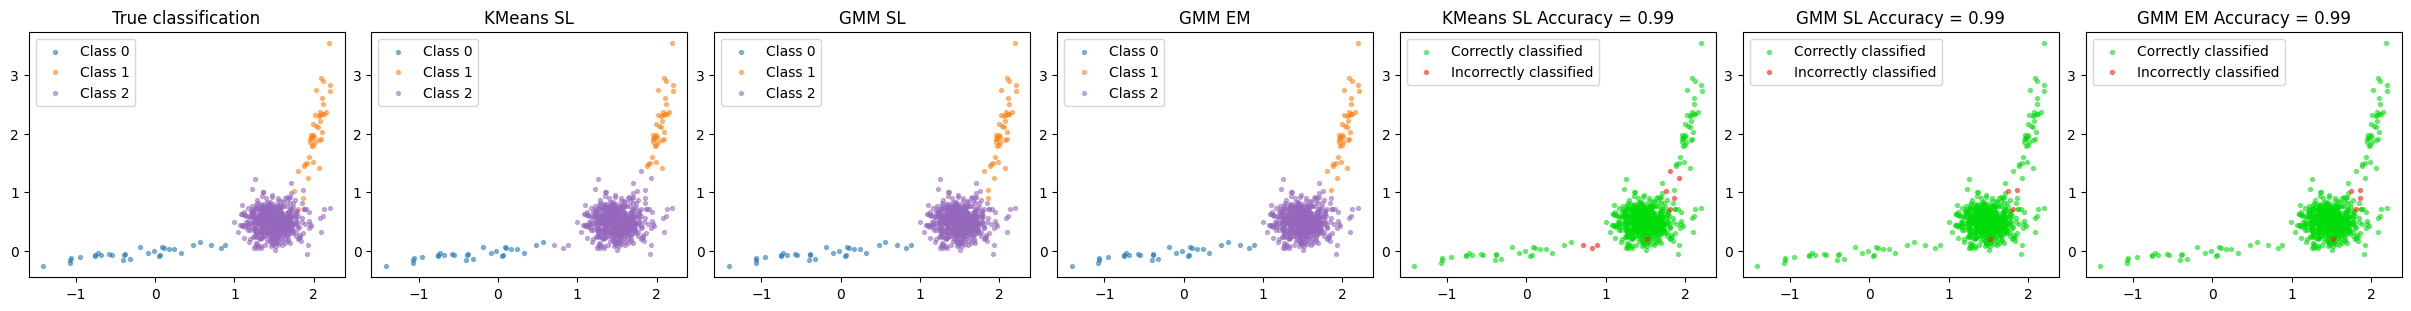

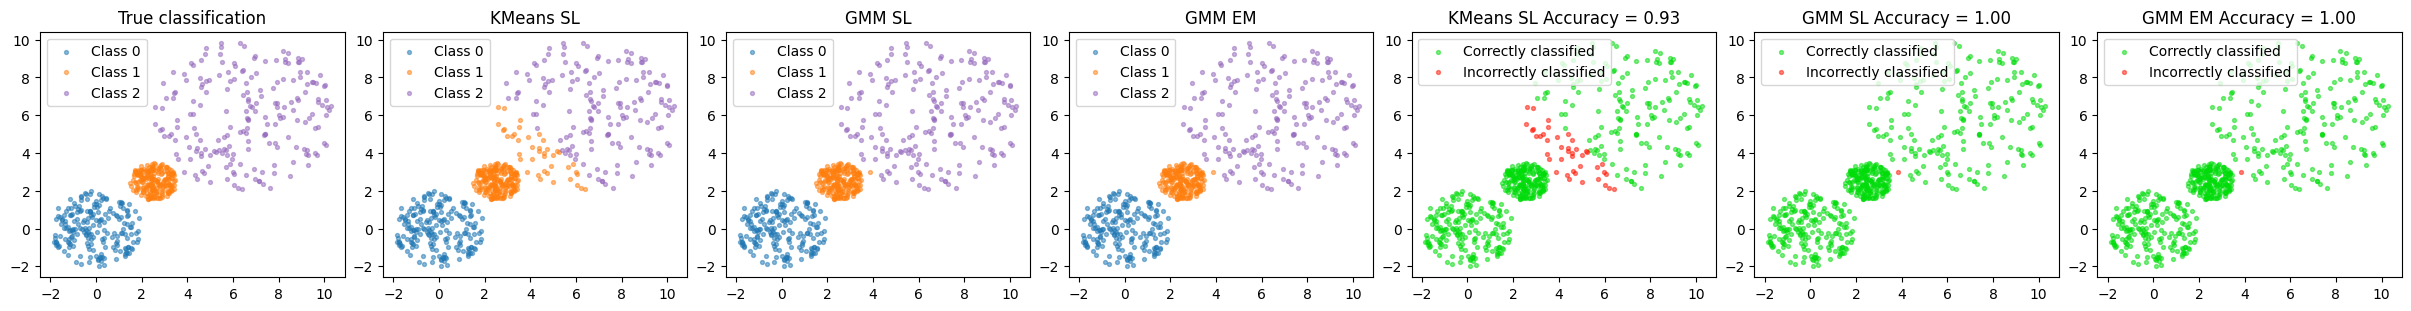

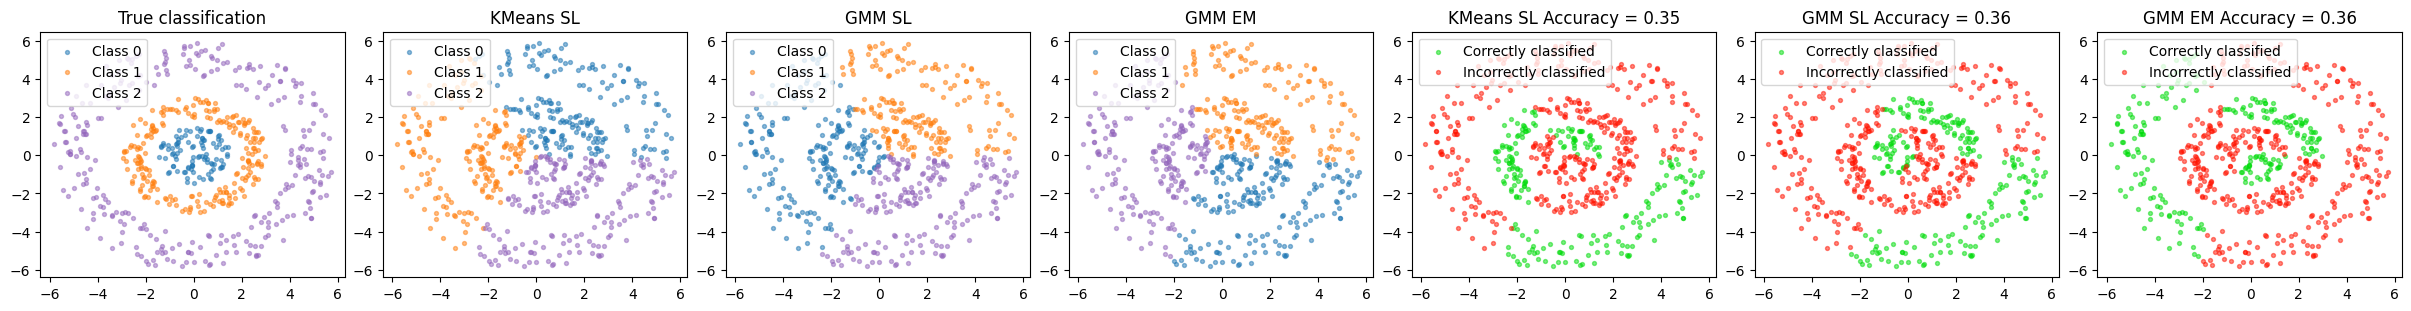

*************************************************
DATA SET :  Gaussian Mixture
		KMeans	GMM SL	GMM EM	
Accuracy	0.985	0.993	0.992	
F1-score	0.985	0.993	0.992	
BAccuracy	0.918	0.973	0.965	
*************************************************

Confusion Matrices:


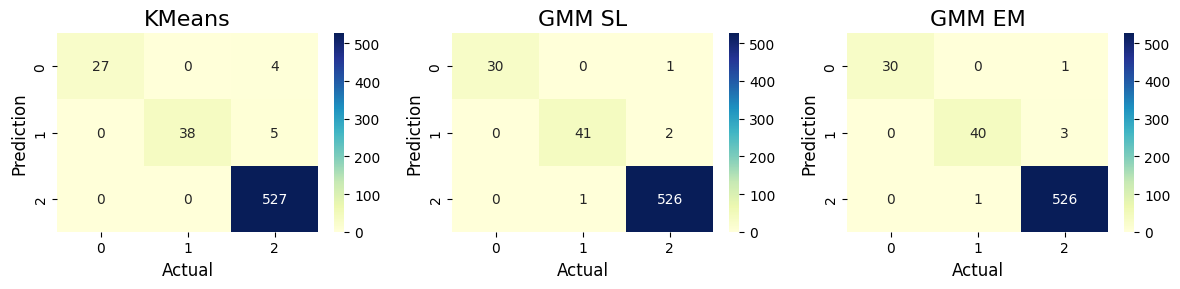

DATA SET :  Non-Concentric Circles
		KMeans	GMM SL	GMM EM	
Accuracy	0.932	0.998	0.998	
F1-score	0.931	0.998	0.998	
BAccuracy	0.932	0.998	0.998	
*************************************************

Confusion Matrices:


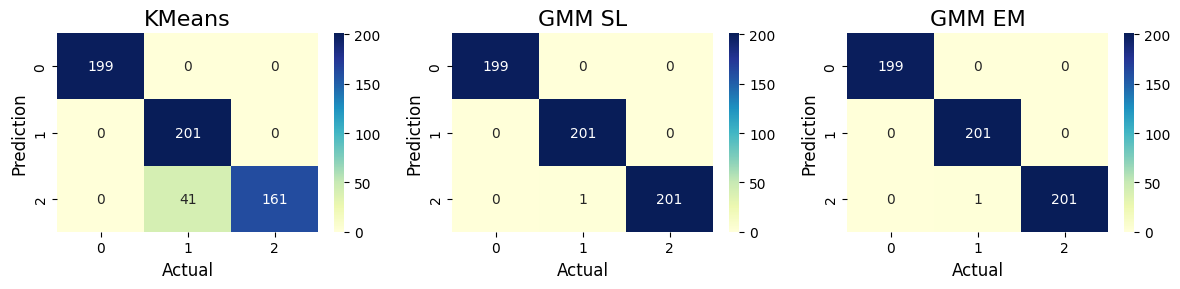

DATA SET :  Concentric Circles
		KMeans	GMM SL	GMM EM	
Accuracy	0.349	0.359	0.358	
F1-score	0.364	0.374	0.371	
BAccuracy	0.349	0.372	0.364	
*************************************************

Confusion Matrices:


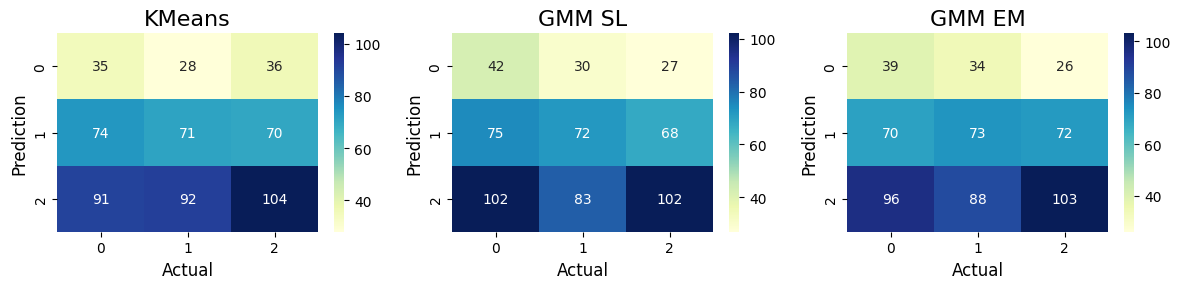

In [ ]:
label_test = [X_gm_test, X_ncc_test, X_cc_test]
sample_test = [Y_gm_test, Y_ncc_test, Y_cc_test]

# Predict the models
X_gmm_em, X_gmm, X_km, good_gmm_em, good_km, good_gmm, label_pred_vec= predict_models(M,label_test, sample_test, pi_gmm_em, mu_gmm_em, cov_gmm_em, gmm, kmeans, mu_0)

# Compare accuracy of models
for i in range(len(mu_0)):
    plot_classification_comparison(sample_test[i], label_test[i], [X_km[i], X_gmm[i], X_gmm_em[i]], [good_km[i], good_gmm[i], good_gmm_em[i]], ["KMeans SL", "GMM SL", "GMM EM"])

label_test = [X_gm_test, X_ncc_test, X_cc_test]
dataset=["Gaussian Mixture","Non-Concentric Circles","Concentric Circles"]
models=["KMeans", "GMM SL", "GMM EM"]
print_evaluation_results(label_test, label_pred_vec, dataset, models,1)

### <font color=#40E0D0> 4.4. Analysis

We evaluate the performance of Gaussian Mixture Models (GMM) using both our implemented function and the GMM model from scikit-learn, alongside the K-Means clustering algorithm. The evaluation is conducted on three different datasets: a Gaussian Mixture, a Non-Concentric Circles dataset, and a Concentric Circles dataset.

**1. Gaussian Mixture Dataset:**

The first dataset consists of a mixture of three Gaussian distributions. Two of these distributions exhibit strong correlations between the x and y labels, while the third one shows no correlation. Across all three algorithms, including K-Means and both GMM implementations, high accuracy scores are achieved. Specifically, the accuracy of K-Means reaches 98.5%, while both GMM models achieve accuracies of 99.3% and 99.2%. Notably, misclassifications are primarily observed along the boundaries of the distributions. The perfectly simetry of confusion matrices show that algortihmes are robust to imbalanced classification.

**2. Non-Concentric Circles Dataset:**

In the second dataset, three non-concentric circles with distinct central points and boundaries are considered. Here, the Gaussian Mixture Models significantly outperform K-Means, achieving accuracies of 99.8% compared to K-Means' accuracy of 93.2%. Misclassifications for the GMM models are minimal and occur primarily at the boundaries, whereas K-Means exhibits misclassifications between the boundary and a distinct cutting line, particularly due to the dense data in the smaller circle.

**3. Concentric Circles Dataset:**

The third dataset comprises three circles with the same central point but different radii. Here, all three models perform poorly, with accuracies around 35%. This suggests that these algorithms struggle when the dataset lacks distinct boundaries between clusters, as observed in this concentric circles scenario. The confusion matrix contains many elements below the diagonal, indicating misclassifications between clusters. This pattern suggests that the models are assigning points to incorrect clusters, likely due to the lack of clear boundaries separating the clusters.

**Conclusion:**

Overall, the Gaussian Mixture Models, whether implemented from scratch or using scikit-learn, consistently outperform K-Means across all datasets. They demonstrate superior ability to capture complex patterns and handle datasets with non-linear boundaries. Additionally, the analysis underscores the importance of dataset characteristics, particularly the presence of distinct cluster boundaries, in determining the efficacy of clustering algorithms.


## <font color=#40E0D0> 5. Classification in $R^d$ where $d>=2$

### <font color=#40E0D0> 5.1. Random Generation of Parameters for Gaussian Mixture Model

The parameters $\mu$, $Σ$, and $\pi$ for the Gaussian Mixture are randomly generated as follows:

\begin{equation}
\mu_m \sim \mathcal{U}([-1, 1]^d) \quad \text{for} \quad m=1,\ldots,M
\end{equation}

\begin{equation}
\Sigma_m = A A^T \text{ where }  A_{i,j} \sim \mathcal{U}([-1, 1]) \quad \text{for} \quad m=1,\ldots,M
\end{equation}

\begin{equation}
\pi_m = \frac{v}{v^T 1_{M}}  \text{ where }  v_{m} \sim \mathcal{U}([0, 1]) \quad \text{for} \quad m=1,\ldots,M
\end{equation}



In [ ]:
def generate_mu(d, size):
    """
    Generate mean vectors for Gaussian Mixture Model.

    Inputs:
        d : Dimensionality of the mean vectors.
        size : Number of mean vectors to generate.

    Returns:
        mu : List of length size containing mean vectors.
    """
    a=-1
    b=1
    return [((b-a)*rng.random(d)+a).tolist() for _ in range(size)]

def generate_cov(d, size):
    """
    Generate covariance matrices for Gaussian Mixture Model.

    Inputs:
        d : Dimensionality of the covariance matrices.
        size : Number of covariance matrices to generate.

    Returns:
        cov : List of length size containing covariance matrices.
    """
    cov = []
    for _ in range(size):
        A = 1 - 2 * rng.random((d, d))
        B = np.dot(A, A.T)
        cov.append(B.tolist())
    return cov

def generate_pi(n_clusters):
    """
    Generate mixture coefficients for Gaussian Mixture Model.

    Inputs:
        n_clusters : Number of mixture components.

    Returns:
        pi : List of length n_clusters containing mixture coefficients.
    """

    pi = rng.random(n_clusters)
    pi = pi / np.sum(pi)
    return pi.tolist()


Here we present six simulations of a mixture of three Gaussian distributions in $R^2$ as examples:

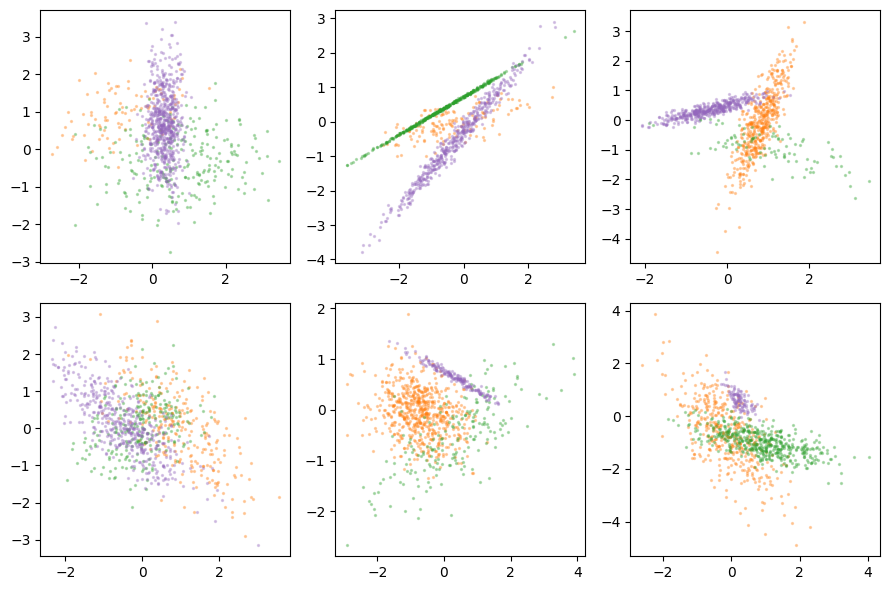

In [ ]:
d=2
n_clust=3
fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(9,6),layout='tight')
for ax in axs.flat:
    mus=generate_mu(d,n_clust)
    covs=generate_cov(d,n_clust)
    weights=generate_pi(n_clust)
    labels,samples=multi_gaussian_mixture_sample(1000, mus, covs, weights)
    ax.scatter(samples[labels==0,0],samples[labels==0,1],color='C1',s=2,alpha=0.3)
    ax.scatter(samples[labels==1,0],samples[labels==1,1],color='C2',s=2,alpha=0.3)
    ax.scatter(samples[labels==2,0],samples[labels==2,1],color='C4',s=2,alpha=0.3)
plt.show()

### <font color=#40E0D0> 5.2. GMM-EM Convergence, Errors and random Initialization

To evaluate the convergence of the EM method, we compare the differences in the values of $\mu$, $\Sigma$, and $\pi$ between each step. We must first define the distance between two sets of parameter values. Let's assume we have  $M$ clusters and at the $k-th$ step, $\mu^{(k)}=(\mu_{1}^{(k)},\ldots,\mu_{M}^{(k)})$ , $\Sigma^{(k)}=(\Sigma_{1},\ldots,\Sigma_{M}^{(k)})$ and $\pi_i=(\pi_{1}^{(k)},\ldots,\pi_{M}^{(k)})$.
\begin{equation}
d(\mu^{(k+1)},\mu^{(k)})=\sum_{j=1}^{M}\| \mu_{j}^{(k+1)}-\mu_{j}^{(k)} \|_2
\end{equation}
\begin{equation}
d(\Sigma^{(k+1)},\Sigma^{(k)})=\sum_{j=1}^{M}\| \Sigma_{j}^{(k+1)}-\Sigma_{j}^{(k)} \|_2
\end{equation}
\begin{equation}
d(\pi^{(k+1)},\pi^{(k)})=\sum_{j=1}^{M}| \pi_{j}^{(k)}-\pi_{j}^{(k)} |
\end{equation}
The relative errors between $k$ and $k+1$ steps are calculated as follows:
\begin{equation}
 err(\mu,k)=\frac{d(\mu^{(k+1)},\mu^{(k)})}{d(\mu^{(k)},0)}
\end{equation}
\begin{equation}
 err(\Sigma,k)=\frac{d(\Sigma^{(k+1)},\Sigma^{(k)})}{d(\Sigma^{(k)},0)}
\end{equation}
\begin{equation}
 err(\pi,k)=\frac{d(\pi^{(k+1)},\pi^{(k)})}{d(\pi^{(k)},0)}
\end{equation}
In our EM funcion, we use the relative error of loglikelihood as an end condition. Typically, the end of the EM algorithm also indicates the convergence of parameters $\theta^{(k)}=(\mu^{(k)},\Sigma^{(k)},\pi^{(k)})$,  meaning all these relative errors converge to 0.



In [ ]:
def plot_gmm_em_errors(error_mu, error_cov, error_pi, loglikelihood_gmm_em, title,d,M):

  fig,axs=plt.subplots(nrows=1, ncols=4, figsize=(4*4, 3),layout="tight")

  total_iter  = error_mu.shape[0]
  M = error_mu.shape[1]
  x=np.arange(1,total_iter+1,1)

  # Errors
  type_error = [error_mu,
                error_cov,
                error_pi]

  name_error = ["Mu","Cov","Pi"]

  for ind, ax in enumerate(axs.flat[:-1]):
    for i in range(M):
      ax.plot(x, type_error[ind][:,i], label=f'Class {i}')
    ax.set_title(name_error[ind])
    ax.legend(loc='upper right')
    ax.set_xlabel("iter")

  # Loglikelihood
  last_ax = axs.flat[-1]
  last_ax.plot(x, loglikelihood_gmm_em, color='#8C14E2', label='loglikelihood')
  last_ax.set_title('Loglikelihood')
  last_ax.set_xlabel("iter")
  title_ = title + fr" $M = {M}$ and $d = {d}$"
  fig.suptitle(title_)


In order to understand the effect of initialization on EM algorithm results, we compare k-means initialization with random initialization. The random initialization involves randomly dividing samples into clusters and using their means as the initial means for the EM algorithm.


The mean vectors ($ \mu $) are initialized as:

\begin{equation}
\mu_i = \frac{1}{|C_i|} \sum_{\mathbf{x} \in C_i} \mathbf{x}
\end{equation}

where $ \mu_i $ represents the mean vector of cluster $ i $, $ C_i $ denotes the set of data points belonging to cluster $ i $, and $ \mathbf{x} $ represents a data point in the cluster.


The covariance matrices ($ \Sigma $) are:

\begin{equation}
\Sigma_i = \mathbf{I}_d
\end{equation}

where $ \Sigma_i $ represents the covariance matrix of cluster $ i $, and $ \mathbf{I}_d $ denotes the identity matrix of size $ d \times d $.


T mixture coefficients ($ \pi $) are:

\begin{equation}
\pi_i = \frac{1}{M}
\end{equation}

where $ \pi_i $ represents the mixture coefficient of cluster $ i $, and $ M $ denotes the total number of clusters. Each mixture coefficient $ \pi_i $ is initialized uniformly, with each cluster having an equal contribution to the mixture.




In [ ]:
def initialization_random(Y,M,d):
    n_samples=np.size(Y,axis=0)
    pi=np.ones(M)/M
    label_rand=np.random.choice(M,n_samples)
    mu=[]
    for i in range(M):
        mean=np.mean(Y[label_rand==i,:],axis=0)
        mu.append(mean)
    mu=np.array(mu)
    cov=np.array([np.eye(d) for i in range(M)])
    return mu.tolist(),cov.tolist(),pi.tolist()

### <font color=#40E0D0> 5.3. Experiments in $R^d$

Then we will do additional tests using Gaussian mixture models with $n$ simulations in higher dimensions and varying numbers of clusters. As an example, we select $n=2000$ samples, $d=15$ dimensions, and $M=4$ clusters.

\begin{equation}
{\color{#EC7063}{If  \  the \ functions \ below \ doesn't \ work \ well, \ just \ retart \ it \ again}}
\end{equation}

Function for Comparison of Gaussian Mixture Model Implementations with Different Initialization Methods for Experimentation

In [ ]:
def gaussian_mixture_experiment(d, n_samples, M):

  # Combine parameters for all components

  mus=generate_mu(d,M)
  covs=generate_cov(d,M)
  weights=generate_pi(M)


  # Generate samples from the Gaussian mixture distribution
  X_gm,Y_gm = multi_gaussian_mixture_sample(n_samples, mus, covs, weights)

  #  Splitting the data into training and testing sets at the cluster level.
  X_gm_train, Y_gm_train, X_gm_test, Y_gm_test = split_train_test_mixture(X_gm, Y_gm, test_size=0.3, random_state=42)


  # Initialization kmeans
  mu_gm_0, covariances_gm_0, pi_gm_0 = initialization_kmeans(Y_gm_train, M, d)
  mu_gm_0, covariances_gm_0, pi_gm_0,_ = reorder_unsupervised(mus, mu_gm_0, covariances_gm_0, pi_gm_0, None)

  # Initialization random centers GMM
  mu_gm_0_random,cov_gm_0_random,pi_gm_0_random=initialization_random(Y_gm_train,M,d)
  mu_gm_0_random=[mu_gm_0_random]
  cov_gm_0_random=[cov_gm_0_random]
  pi_gm_0_random=[pi_gm_0_random]
  # Training

  # Initial values for every train set
  sample_train = [Y_gm_train]
  mu_0 = [mu_gm_0]
  covariances_0 = [covariances_gm_0]
  pi_0 = [pi_gm_0]


  # Estimated parameters
  pi_gmm_em, mu_gmm_em, cov_gmm_em, loglikelihood_gmm_em, gmm, kmeans, error_mu, error_cov, error_pi = train_models(sample_train, mu_0, covariances_0, pi_0,M)


  # Estimated parameters random centers GMM
  pi_gmm_em_random, mu_gmm_em_random, cov_gmm_em_random, loglikelihood_gmm_em_random, _, _, error_mu_random, error_cov_random, error_pi_random = train_models(sample_train, mu_gm_0_random, cov_gm_0_random, pi_gm_0_random,M)


  error_mu = np.array(error_mu[0])
  error_cov = np.array(error_cov[0])
  error_pi = np.array(error_pi[0])
  loglikelihood_gmm_em = np.array(loglikelihood_gmm_em[0])


  error_mu_random = np.array(error_mu_random[0])
  error_cov_random = np.array(error_cov_random[0])
  error_pi_random = np.array(error_pi_random[0])
  loglikelihood_gmm_em_random = np.array(loglikelihood_gmm_em_random[0])

  # Classification on test and performance
  label_test = [X_gm_test]
  sample_test = [Y_gm_test]

  # Predict the models
  X_gmm_em, X_gmm, X_km, good_gmm_em, good_km, good_gmm, label_pred_vec = predict_models(M,label_test, sample_test, pi_gmm_em, mu_gmm_em, cov_gmm_em, gmm, kmeans, mu_0)
  X_gmm_em_random, _, _, good_gmm_em_random, _, _, label_pred_vec_random = predict_models(M,label_test, sample_test, pi_gmm_em_random, mu_gmm_em_random, cov_gmm_em_random, None, None, mu_gm_0_random)

  label_pred_vec[0].append(label_pred_vec_random[0][2])

  # Compare accuracy of models


  label_test = [X_gm_test]
  dataset=["Gaussian Mixture"]
  models=["KMeans", "GMM SL", "GMM EM","GMM EM: Random Initialization"]

  # Results of dataframe

  results=[]

  for j in range(len(models)):
      accuracy, f1, balanced_accuracy,matriz = evaluation_metrics(label_test[0], label_pred_vec[0][j])
      if j==0:
          iterations=kmeans[-1].n_iter_
          results.append([M,d,models[j],iterations,accuracy] )
      if j==1:
          iterations=gmm[-1].n_iter_
          results.append([M,d,models[j],iterations,accuracy])
      if j==2:
          iterations=np.size(loglikelihood_gmm_em)
          results.append([M,d,models[j],iterations,accuracy])
      if j==3:
          iterations=np.size(loglikelihood_gmm_em)
          results.append([M,d,models[j],iterations,accuracy])

  summary = pd.DataFrame(results ,columns=["M","d","Model","iterations","accuracy" ])


  return summary,label_test, label_pred_vec, dataset, models,error_mu, error_cov, error_pi, loglikelihood_gmm_em,error_mu_random, error_cov_random, error_pi_random, loglikelihood_gmm_em_random

In [ ]:
# Set the seed
from numpy.random import default_rng
rng = default_rng(400)

n_samples = 1000      # size sample

vector_d = [2,5,15] # dimension
vector_M = [2,3,4] # Number of clusters

results = pd.DataFrame(columns=["M","d","Model","iterations", "accuracy" ])

dicc = {}

for i in range(len(vector_M)):
  for j in range(len(vector_d)):
    M         = vector_M[i]
    d         = vector_d[j]
    key     = (vector_d[j], vector_M[i])
    dicc[key] = gaussian_mixture_experiment(d, n_samples, M)

for i in range(len(vector_M)):
  for j in range(len(vector_d)):
    key       = (vector_d[j], vector_M[i])
    summary     = dicc[key][0]
    results     = pd.concat([results, summary])


Comparison of **accuracy** results across models (varying categories and dimensions).

In [ ]:
results[['M','d','Model','accuracy']].pivot(index=['M','d'], columns='Model', values='accuracy').reset_index()

Model,M,d,GMM EM,GMM EM: Random Initialization,GMM SL,KMeans
0,2,2,1.000000,1.000000,1.000000,0.856667
1,2,5,0.910299,0.910299,0.910299,0.657807
2,2,15,1.000000,1.000000,1.000000,0.591362
3,3,2,0.671096,0.700997,0.504983,0.521595
4,3,5,0.990033,0.990033,0.990033,0.468439
5,3,15,0.937086,0.827815,0.986755,0.387417
6,4,2,0.576159,0.572848,0.579470,0.407285
7,4,5,0.970100,0.970100,0.970100,0.425249
8,4,15,1.000000,1.000000,0.930464,0.347682


Comparison of **iterations** results across models (varying categories and dimensions).

In [ ]:
results[['M','d','Model','iterations']].pivot(index=['M','d'], columns='Model', values='iterations').reset_index()

Model,M,d,GMM EM,GMM EM: Random Initialization,GMM SL,KMeans
0,2,2,9,9,13,1
1,2,5,13,13,10,1
2,2,15,10,10,9,1
3,3,2,27,27,11,2
4,3,5,18,18,15,2
5,3,15,16,16,12,1
6,4,2,40,40,22,1
7,4,5,24,24,29,1
8,4,15,12,12,13,1


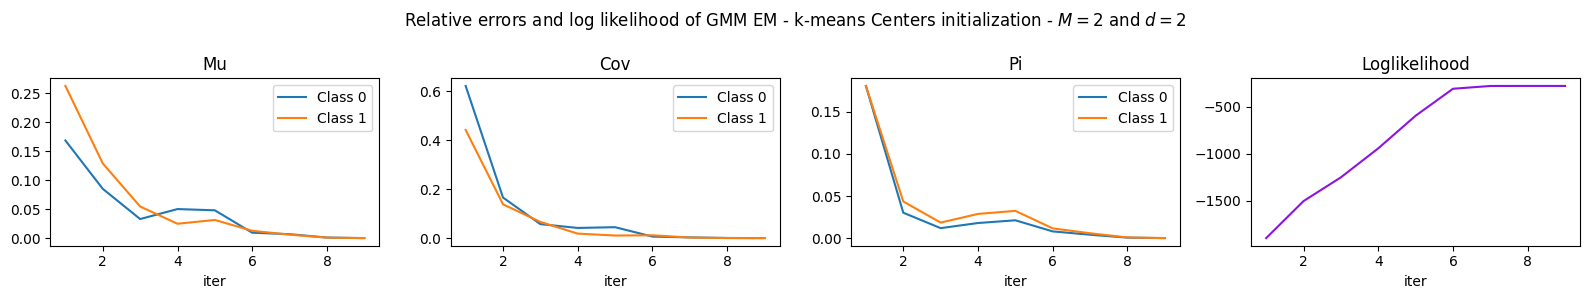

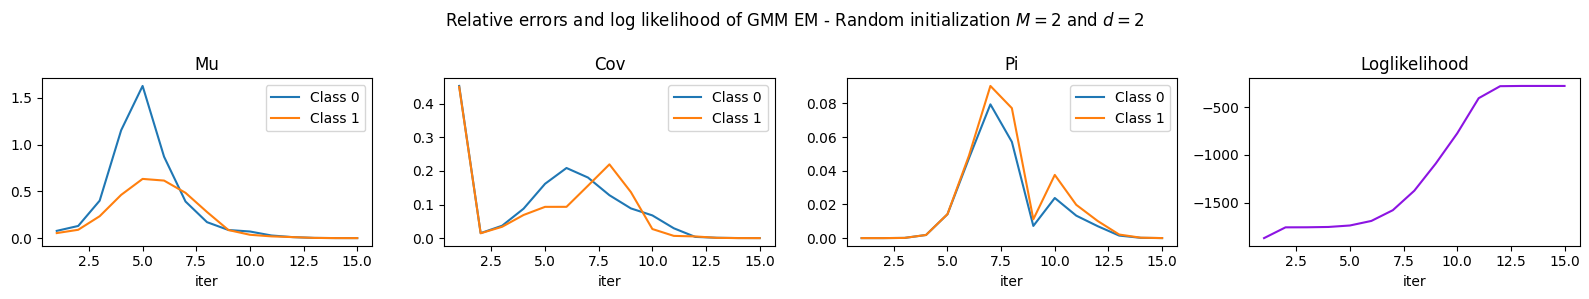

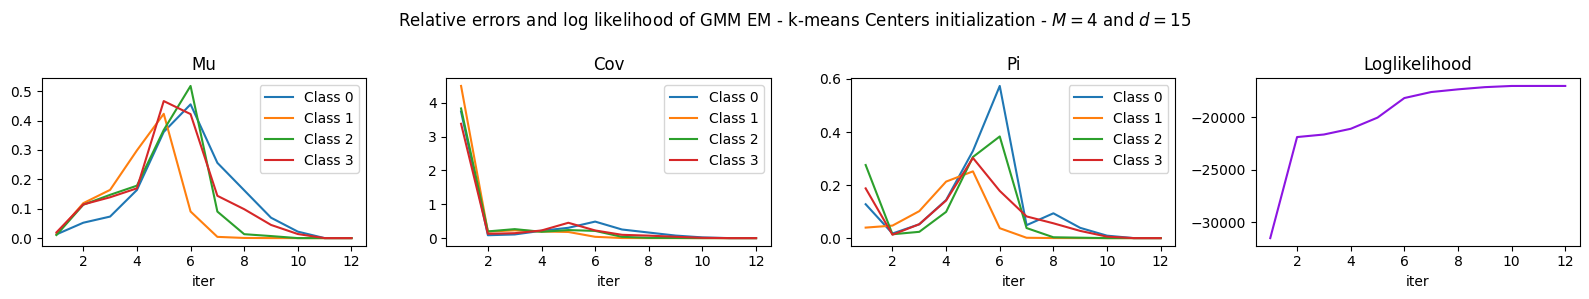

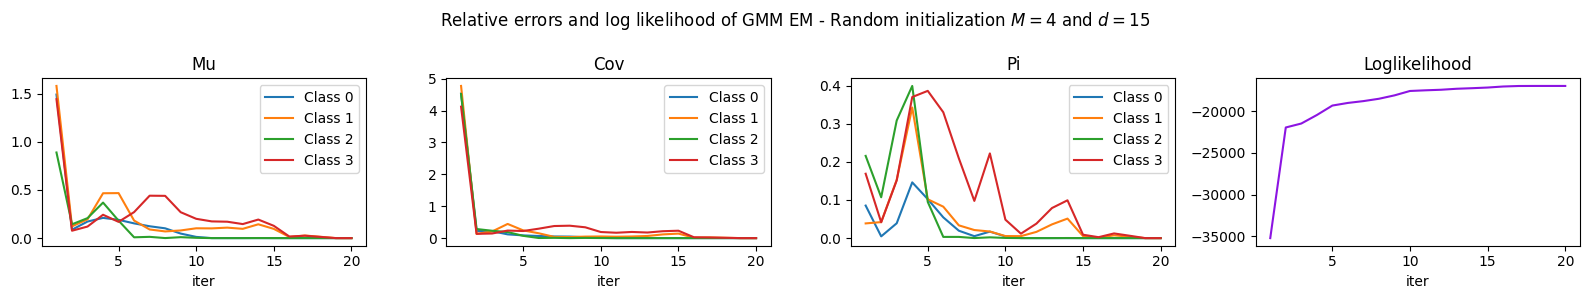

In [ ]:
plots_relevants=[(vector_d [0],vector_M[0]),(vector_d[-1] ,vector_M[-1])]

for k in range(len(plots_relevants)):
  key   = plots_relevants[k]
  d     =  key[0]
  M     =  key[1]

  error_mu_               = dicc[key][5]
  error_cov_              = dicc[key][6]
  error_pi_               = dicc[key][7]
  loglikelihood_gmm_em_   = dicc[key][8]

  error_mu_random         =   dicc[key][9]
  error_cov_random        =   dicc[key][10]
  error_pi_random         =   dicc[key][11]
  loglikelihood_gmm_em_random =  dicc[key][12]

  plot_1 = plot_gmm_em_errors(error_mu_, error_cov_, error_pi_, loglikelihood_gmm_em_,"Relative errors and log likelihood of GMM EM - k-means Centers initialization -",d,M)
  plot_2 =plot_gmm_em_errors(error_mu_random, error_cov_random, error_pi_random, loglikelihood_gmm_em_random,"Relative errors and log likelihood of GMM EM - Random initialization",d,M)

## <font color=#40E0D0> 6. Conclusion

1. In most simulations, the EM algorithm converges effectively, showing a significant reduction in the relative errors of key parameters and a rapid stabilization in the log-likelihood function. Additionally, its classification accuracy reaches exceptional levels, sometimes reaching 0.99-1.

2. The GMM algorithms (SL, K-means Initialization, and Random Initialization) exhibit similar performance, leading to the following conclusions:
- the robustness of our algorithmic approach.
- the potency of these types of algorithms.
- highlighting the sensitivity of the K-means algorithm when datasets are not separable. It's important to understand the nature of the data beforehand when applying the model.

3. In terms of convergence speed, sklearn algorithms like K-means and GMM SL outperform our own algorithm in speed.

4. Random simulations are not easy to conduct; ensuring symmetry and positivity in the covariance matrix is necessary.

5. The sensitivity to the initial point is crucial in these algorithms. We can initialize using K-means or random initialization, but based on the descriptive analysis of the data.

6. Initializing with K-means has the advantage of starting with a higher log-likelihood, which usually requires fewer iterations compared to random initialization. Overall, this leads to faster convergence, although there may be exceptions.

7. As the dimensions of the data increase, the algorithm tends to converge faster and achieve higher accuracy, although this effect may not be as evident in the case of only two clusters.

8. On the other hand, as the number of clusters increases, the algorithm usually converges more slowly and may experience a decrease in accuracy due to the increased complexity of the search space.